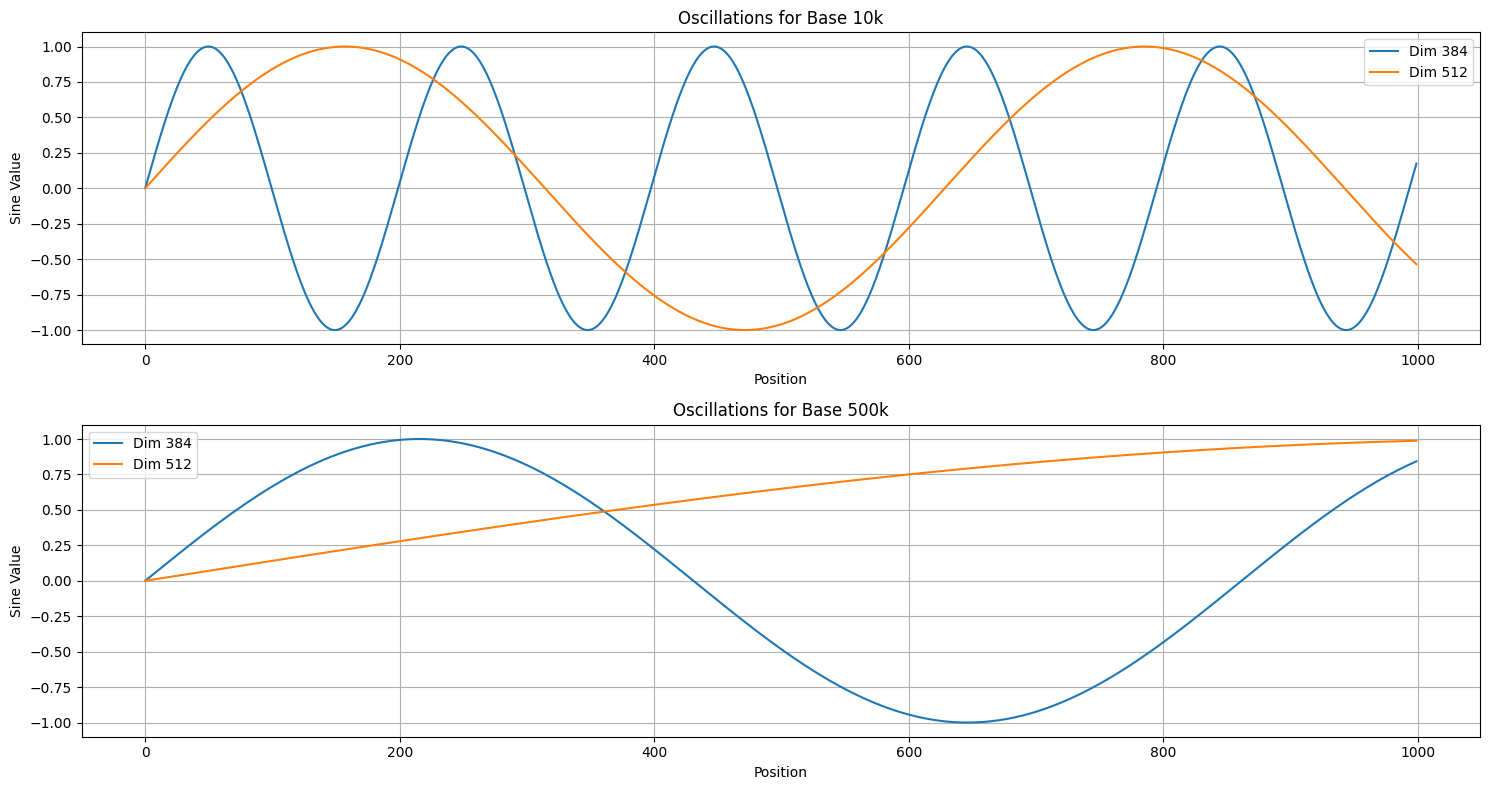

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
positions = np.arange(0, 1000)  # Token positions
dims = [384, 512]  # Example dimensions
# dims = [512]
base_10k = 10000  # Base of 10k
base_500k = 500000  # Base of 500k
model_dim = 1024  # Total model dimension

# Function to calculate frequencies based on base and dimension
def calculate_frequencies(base, dim, model_dim):
    return 1.0 / (base ** (dim / model_dim))

# Calculate oscillations for sine wave embeddings
def sinusoidal_embeddings(base):
    embeddings = []
    for dim in dims:
        frequency = calculate_frequencies(base, dim, model_dim)
        embeddings.append(np.sin(positions * frequency))
    return embeddings

# Generate embeddings for base 10k and 500k
embeddings_10k = sinusoidal_embeddings(base_10k)
embeddings_500k = sinusoidal_embeddings(base_500k)

# Plot
plt.figure(figsize=(15, 8))
for i, dim in enumerate(dims):
    # Plot for base 10k
    plt.subplot(2, 1, 1)
    plt.plot(positions, embeddings_10k[i], label=f"Dim {dim}")
    plt.title("Oscillations for Base 10k")
    plt.xlabel("Position")
    plt.ylabel("Sine Value")
    plt.grid(True)
    plt.legend()

    # Plot for base 500k
    plt.subplot(2, 1, 2)
    plt.plot(positions, embeddings_500k[i], label=f"Dim {dim}")
    plt.title("Oscillations for Base 500k")
    plt.xlabel("Position")
    plt.ylabel("Sine Value")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from numpy import copy
import torch 

theta_base = 500_000
head_dim = 512
freq_config = {
    "original_context_length": 8192,
    "low_freq_factor": 1,
    "high_freq_factor": 4,
    "factor": 8,
}
# Compute the inverse frequencies
inv_freq = 1.0 / (
    theta_base
    ** (torch.arange(0, head_dim, 2)[: (head_dim // 2)].float() / head_dim)
)

og_inv_freq = copy(inv_freq)

################################ NEW ###############################################
# Frequency adjustments
if freq_config is not None:
    low_freq_wavelen = (
        freq_config["original_context_length"] / freq_config["low_freq_factor"]
    )
    high_freq_wavelen = (
        freq_config["original_context_length"] / freq_config["high_freq_factor"]
    )

    wavelen = 2 * torch.pi / inv_freq

    inv_freq_llama = torch.where(
        wavelen > low_freq_wavelen, inv_freq / freq_config["factor"], inv_freq
    )

    # Get the indexes of the frequencies that are in the medium range
    is_medium_freq = (wavelen <= low_freq_wavelen) & (wavelen >= high_freq_wavelen)

    # Get the first instance of true in is_medium_freq
    first_true = torch.argmax(is_medium_freq.long())

    # Get last instance of true 
    last_true = torch.nonzero(is_medium_freq)[-1]

    print(first_true, last_true)   



    smooth_factor = (
        freq_config["original_context_length"] / wavelen
        - freq_config["low_freq_factor"]
    ) / (freq_config["high_freq_factor"] - freq_config["low_freq_factor"])

    smoothed_inv_freq = (1 - smooth_factor) * (
        inv_freq / freq_config["factor"]
    ) + smooth_factor * inv_freq

    is_medium_freq = (wavelen <= low_freq_wavelen) & (wavelen >= high_freq_wavelen)
    inv_freq_llama = torch.where(is_medium_freq, smoothed_inv_freq, inv_freq_llama)
    inv_freq = inv_freq_llama

tensor(113) tensor([139])


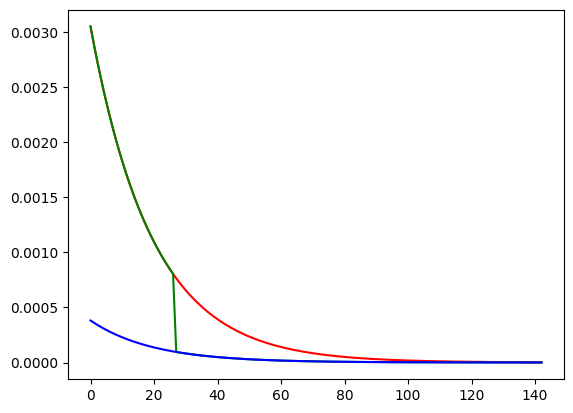

In [55]:
import matplotlib.pyplot as plt

offset = 113
plt.plot(inv_freq[offset:], c="r", label="Adjusted")
plt.plot(inv_freq_llama[offset:], c="g", label="Original")
plt.plot((inv_freq / freq_config["factor"])[offset:], c="b", label="Original")

In [33]:
(inv_freq  ==  og_inv_freq)[113:]

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 